In [175]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# Data Preprocessing 

In [176]:
df = pd.read_csv("train_data.csv")
df.head(3)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


In [177]:
#Drop the columns ID and HealthServiceArea
df.drop(columns = ['ID','HealthServiceArea'],inplace=True,axis=1)
df.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


 ## EDA (Exploratory Data Analysis

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

The data has  categorical columns :
<br> 1.Gender
<br> 2.Race
<br> 3.TypeOfAdmission
<br> 4.PaymentTypology
<br> 5.Emergency Depearment Indicator 
<br> <b> Even though the columns CCSProcedureCode and APRSeverityofIllnessCode are numeric, they seem to be categorical in nature which must be verified 

In [179]:
df.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


Few observations from the description statistics:
    <br>1. The average LengthOfStay(LOS) is 2.53 and the min=1 and max=10
    <br>2. The average AverageCostInCounty is 2372 and AvergaeChargesInCounty is 7979 . whats the correlatio between these two ?
    <br><b> It would be interesting to observe the correlation between these and the LengthOfStay(LOS)

### Class imbalance investigation

In [180]:
#Getting and idea of the LengthOfStay 
col_values = df['LengthOfStay'].values
df.groupby(['LengthOfStay']).count()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
LengthOfStay,,,,,,,,,,,,,
1,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895
2,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
3,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000
4,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504
5,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342
6,557,557,557,557,557,557,557,557,557,557,557,557,557
7,346,346,346,346,346,346,346,346,346,346,346,346,346
8,145,145,145,145,145,145,145,145,145,145,145,145,145
9,97,97,97,97,97,97,97,97,97,97,97,97,97


The examples with < 4 days is 49895 and 10,071 >=4 days .
<br> 1. (<  4 days) => 83.36 %
<br> 2. (>=4 days) => 16.64 %
<br><b>This resembles a good amount of class imbalance . Hence even need to think of decision trees as a mechanism for the same



In [181]:
#So lets change the LengthOfStay 
def change_los(x):
    if x < 4:
        return 0
    return 1
df['LengthOfStay'] = df['LengthOfStay'].apply(change_los)

In [182]:
df['LengthOfStay'][0:3]

0    0
1    0
2    0
Name: LengthOfStay, dtype: int64

In [183]:
col_values = df['LengthOfStay'].values
df.groupby(['LengthOfStay']).count()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
LengthOfStay,,,,,,,,,,,,,
0,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895
1,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071


<b> So the above change was successful and this confirms our previous undesrtanding that the datasets contains more samples of LOS < 4 

 ### NULL values investigation

In [184]:
df.isnull().any()

Gender                          False
Race                            False
TypeOfAdmission                 False
CCSProcedureCode                False
APRSeverityOfIllnessCode        False
PaymentTypology                 False
BirthWeight                     False
EmergencyDepartmentIndicator    False
AverageCostInCounty             False
AverageChargesInCounty          False
AverageCostInFacility           False
AverageChargesInFacility        False
AverageIncomeInZipCode          False
LengthOfStay                    False
dtype: bool

<b> So the dataset doesnot contain any NULL values 

## **Data visualization, Attribute correlation and dependence

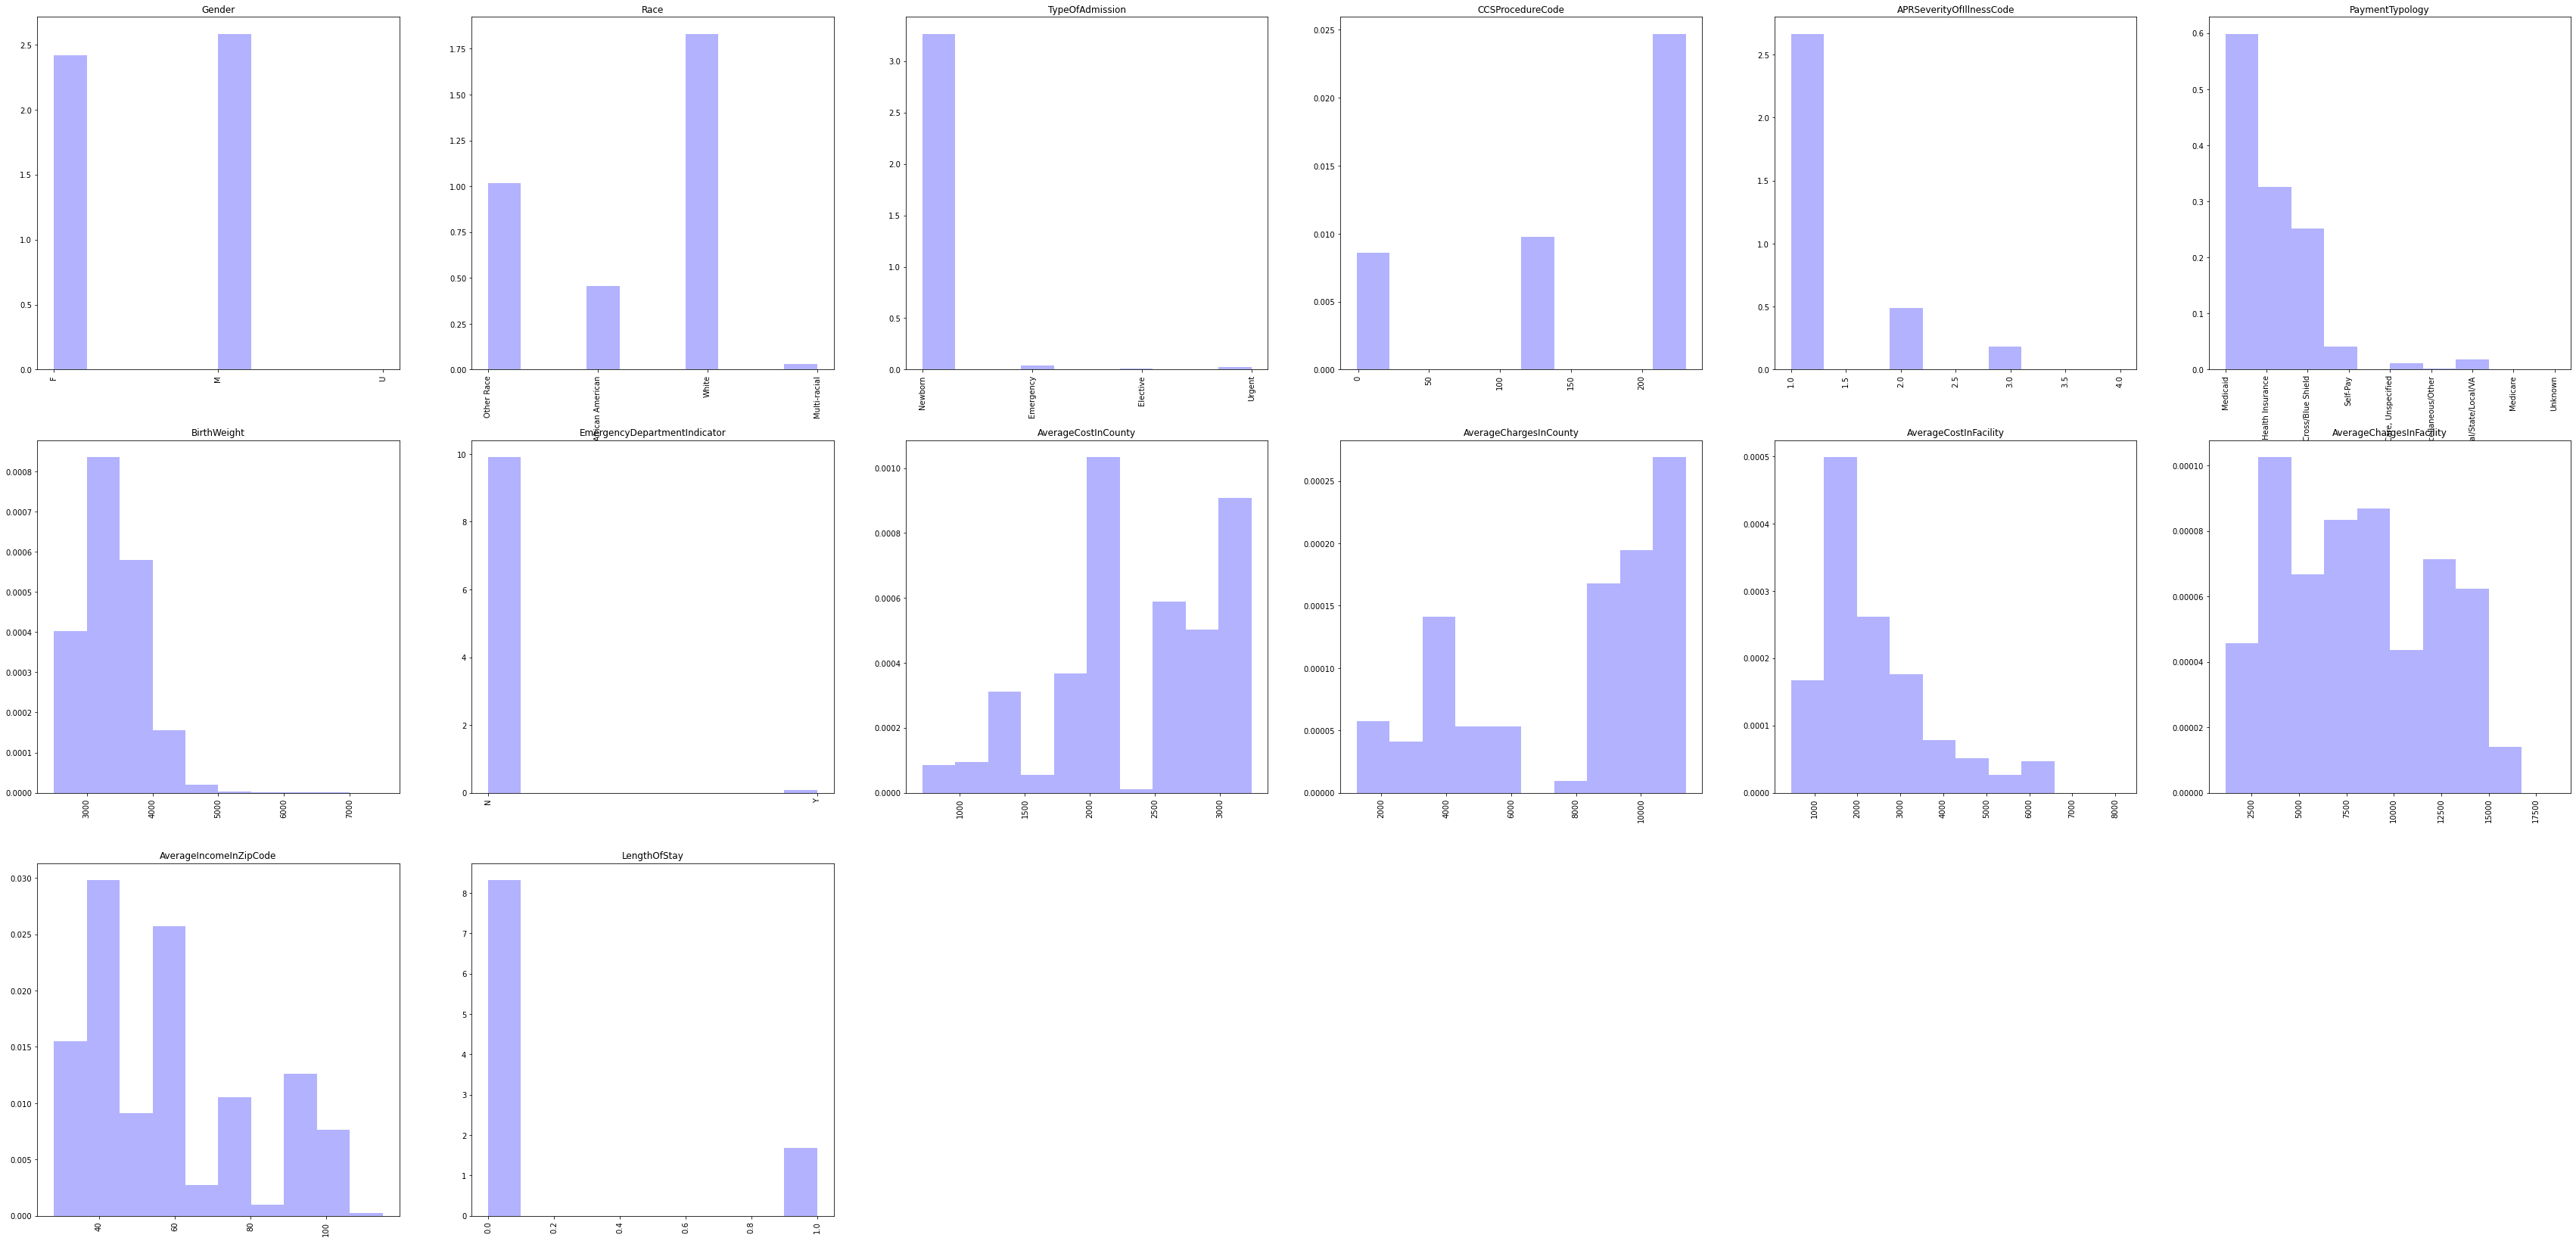

In [185]:
plt.figure(figsize=(60,60))
#plt.figure(figsize=(6,6))
for i,col in enumerate(df.columns):
    plt.subplot(6,6,i+1)
    plt.hist(df[col],alpha=0.3, color= 'b',density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [186]:

df[['Race','Gender']].groupby(['Race']).count()


,Gender
Race,
Black/African American,8183
Multi-racial,526
Other Race,18314
White,32943


In [187]:
df[['Race','Gender']].groupby(['Gender']).count()

,Race
Gender,
F,28987
M,30978
U,1


<b>*Key takeaways from the sample given:*</b>
    <br>1.*Definitely the classes are imbalanced with respect to LengthofStay as the measure* 
    <br>2.*Females are 48.34 % and males form 51.66 % of the samples*
    <br>3.*Whites are 54.94% ,30.54% other race and 13.65% Black/African American and remaining Multi racial* 
   

In [188]:
df[['Race','TypeOfAdmission']].groupby(['TypeOfAdmission']).count()

,Race
TypeOfAdmission,
Elective,154
Emergency,659
Newborn,58741
Urgent,412


<b>*The large number of observations are related to Newborn (97.96%) with next highest being Emergencies followed by Urgent and the Elective samples are very less*

(array([4.03628723e-04, 8.36907581e-04, 5.80362205e-04, 1.55488110e-04,
        2.07450889e-05, 2.10119067e-06, 3.33522329e-07, 3.00170096e-07,
        1.00056699e-07, 3.33522329e-08]),
 array([2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000., 6500.,
        7000., 7500.]),
 <BarContainer object of 10 artists>)

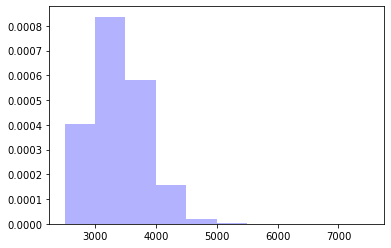

In [189]:
#Exploring birthweight distribution   
plt.hist(df['BirthWeight'],alpha=0.3, color= 'b',density=True)

In [190]:
print("Max=",df['BirthWeight'].max())
print("Min=",df['BirthWeight'].min())

Max= 7500
Min= 2500


<b>*So the birth weight of 7500 looks like an outlier and we cannot assume the distribution is skewed rather anything above 5000 must be assumned to be an outlier condition*

(array([0.00859539, 0.        , 0.        , 0.        , 0.        ,
        0.00979578, 0.        , 0.        , 0.        , 0.02471228]),
 array([ -1. ,  22.2,  45.4,  68.6,  91.8, 115. , 138.2, 161.4, 184.6,
        207.8, 231. ]),
 <BarContainer object of 10 artists>)

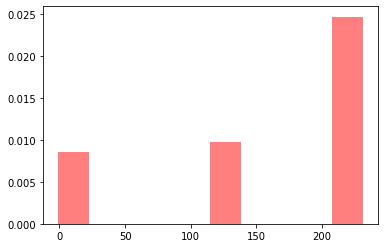

In [191]:
plt.hist(df['CCSProcedureCode'],alpha=0.5,color='r',density='True')

In [192]:
df[['CCSProcedureCode','LengthOfStay']].groupby(['CCSProcedureCode']).count()

,LengthOfStay
CCSProcedureCode,
-1,769
0,11189
115,13628
216,740
220,10773
228,19886
231,2981


<b>So the CCS procedure code is kind of fixed and we can assume that only specific codes . We can assume its ordinal in nature

(array([2.66556604e+00, 0.00000000e+00, 0.00000000e+00, 4.86942601e-01,
        0.00000000e+00, 0.00000000e+00, 1.80769102e-01, 0.00000000e+00,
        0.00000000e+00, 5.55870549e-05]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

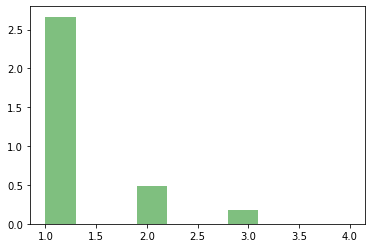

In [193]:
plt.hist(df['APRSeverityOfIllnessCode'],alpha=0.5,color='g',density='True')

In [194]:
string='APRSeverityOfIllnessCode'
df[['CCSProcedureCode',string]].groupby([string]).count()

,CCSProcedureCode
APRSeverityOfIllnessCode,
1,47953
2,8760
3,3252
4,1


<b>*A lot of examples from the training set fall into Category of APRS Severity Illness Code*

(array([5.98735117e-01, 3.25351032e-01, 2.51663443e-01, 4.13567688e-02,
        0.00000000e+00, 1.13606043e-02, 2.45972718e-03, 1.76975286e-02,
        9.17186406e-04, 4.58593203e-04]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

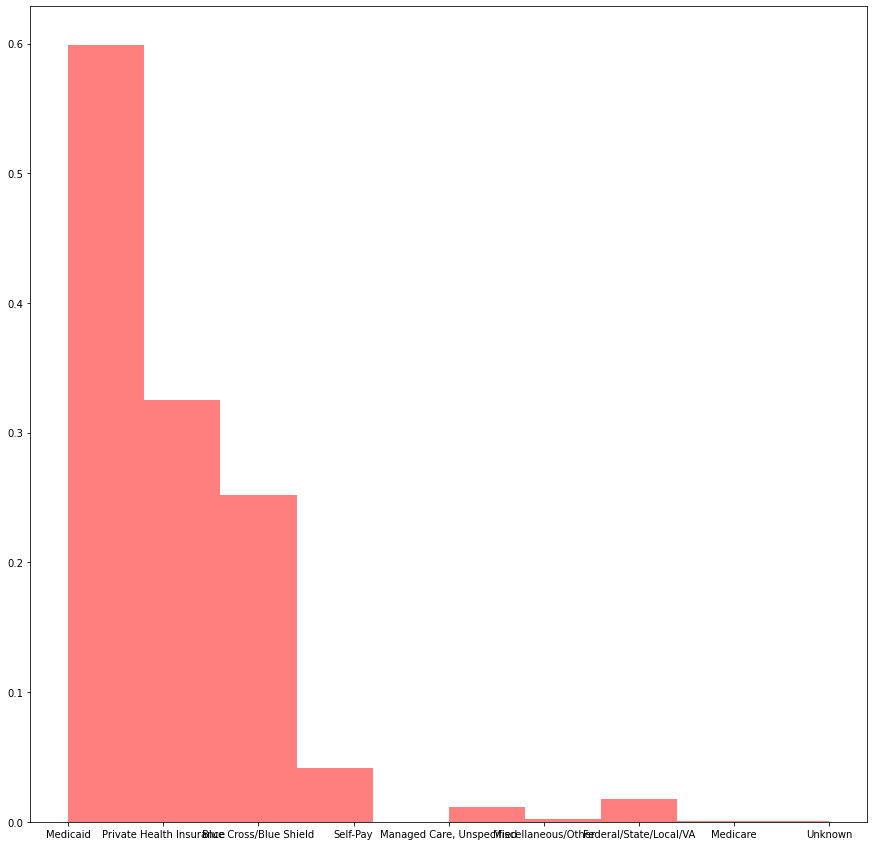

In [195]:
#Exploring Payment Typology
plt.figure(figsize=(15,15))
plt.hist(df['PaymentTypology'],alpha=0.5,color='r',density='True')

In [196]:
string='PaymentTypology'
df[['CCSProcedureCode',string]].groupby([string]).count()

,CCSProcedureCode
PaymentTypology,
Blue Cross/Blue Shield,12073
Federal/State/Local/VA,849
"Managed Care, Unspecified",545
Medicaid,28723
Medicare,44
Miscellaneous/Other,118
Private Health Insurance,15608
Self-Pay,1984
Unknown,22


(array([9.91445152, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08554848]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

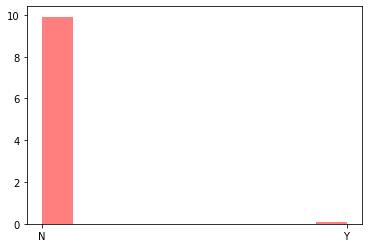

In [197]:
plt.hist(df['EmergencyDepartmentIndicator'],alpha=0.5,color='r',density='True')

<b>*So the severity code even though specified in numerical attribute its ordinal in nature
<br> The EmergencyDepartmentIndicator data shows most cases are not emergency in nature 

### So far in our analysis 

<b>1. Race,Gender,PaymentTypology,TypeOfadmission and EmergencyIndicator are nominal in nature , whereas APRSCode and CCSprocedure code seem to be ordinal in nature
<b><br> The dataset has class imbalance and also mainly contains data of the newborns and non-emergency cases

(array([8.41715444e-05, 9.41244835e-05, 3.11836787e-04, 5.42468136e-05,
        3.66413168e-04, 1.03438062e-03, 9.95293908e-06, 5.87816627e-04,
        5.01733591e-04, 9.07892602e-04]),
 array([ 712.,  965., 1218., 1471., 1724., 1977., 2230., 2483., 2736.,
        2989., 3242.]),
 <BarContainer object of 10 artists>)

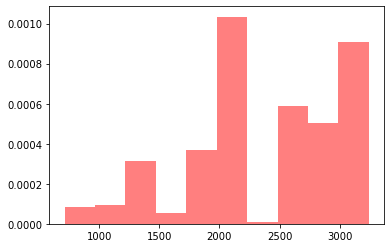

In [198]:
plt.hist(df['AverageCostInCounty'],alpha=0.5,color='r',density='True')

(array([5.71442381e-05, 4.09912036e-05, 1.41084090e-04, 5.32128988e-05,
        5.29661620e-05, 0.00000000e+00, 9.44179409e-06, 1.67748112e-04,
        1.94477930e-04, 2.69321419e-04]),
 array([ 1243. ,  2256.8,  3270.6,  4284.4,  5298.2,  6312. ,  7325.8,
         8339.6,  9353.4, 10367.2, 11381. ]),
 <BarContainer object of 10 artists>)

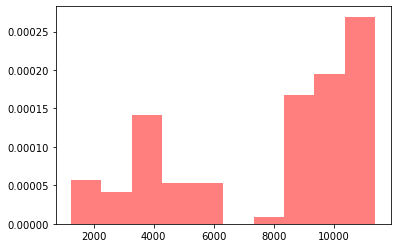

In [199]:
plt.hist(df['AverageChargesInCounty'],alpha=0.5,color='r',density='True')

(array([4.57617401e-05, 1.02646659e-04, 6.66813927e-05, 8.34959481e-05,
        8.67646438e-05, 4.35601774e-05, 7.12960220e-05, 6.23071087e-05,
        1.39784811e-05, 9.61381095e-09]),
 array([ 1120. ,  2854.6,  4589.2,  6323.8,  8058.4,  9793. , 11527.6,
        13262.2, 14996.8, 16731.4, 18466. ]),
 <BarContainer object of 10 artists>)

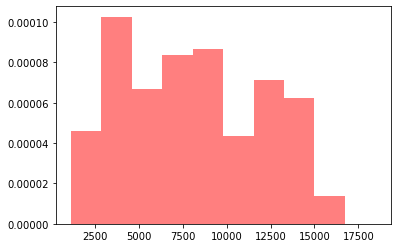

In [200]:
plt.hist(df['AverageChargesInFacility'],alpha=0.5,color='r',density='True')

(array([1.66521597e-04, 4.99129211e-04, 2.61042095e-04, 1.76431004e-04,
        7.82516475e-05, 5.12675698e-05, 2.68098464e-05, 4.65197659e-05,
        0.00000000e+00, 2.17789166e-08]),
 array([ 457. , 1222.7, 1988.4, 2754.1, 3519.8, 4285.5, 5051.2, 5816.9,
        6582.6, 7348.3, 8114. ]),
 <BarContainer object of 10 artists>)

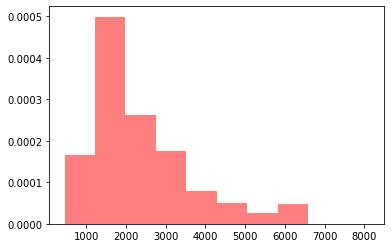

In [201]:
plt.hist(df['AverageCostInFacility'],alpha=0.5,color='r',density='True')

(array([0.01552987, 0.02981958, 0.00911436, 0.02569847, 0.00274868,
        0.01049829, 0.00100057, 0.01260293, 0.00765185, 0.00027794]),
 array([ 28. ,  36.7,  45.4,  54.1,  62.8,  71.5,  80.2,  88.9,  97.6,
        106.3, 115. ]),
 <BarContainer object of 10 artists>)

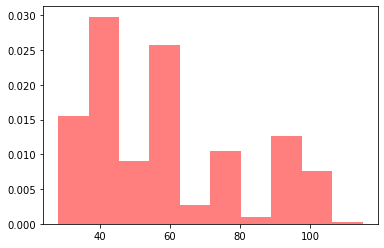

In [202]:
plt.hist(df['AverageIncomeInZipCode'],alpha=0.5,color='r',density='True')

lets focus on now changing the data accordingly and perform scaling etc before we send it to the model 

## Data Correlation

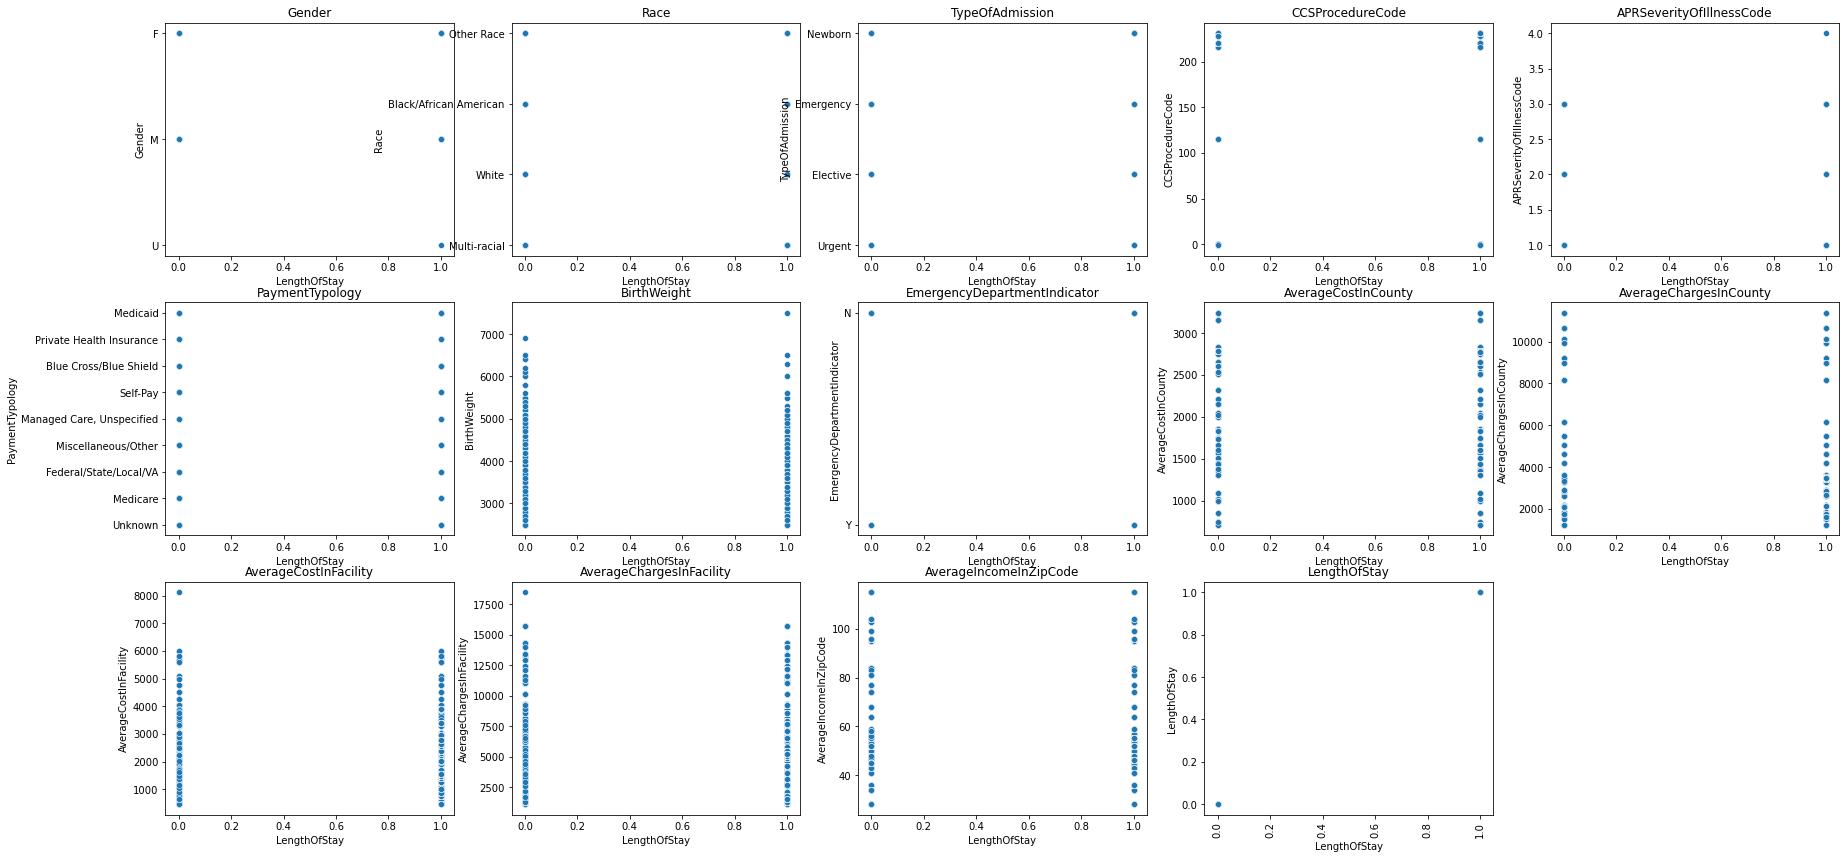

In [203]:
import seaborn as sns
plt.figure(figsize=(30,30))
for i,col in enumerate(df.columns):
    plt.subplot(6,5,i+1)
    sns.scatterplot(data=df,y=col,x='LengthOfStay')
    plt.title(col)
plt.xticks(rotation='vertical')
plt.show()

*The scatterplot does not reveal any major distribution differences from the attributes influencing LOS*

In [204]:
string='Race'
df.groupby([string,'LengthOfStay'])['Gender'].count()

Race                    LengthOfStay
Black/African American  0                6431
                        1                1752
Multi-racial            0                 449
                        1                  77
Other Race              0               15189
                        1                3125
White                   0               27826
                        1                5117
Name: Gender, dtype: int64

In [205]:
string='Gender'
df.groupby([string,'LengthOfStay'])['Gender'].count()

Gender  LengthOfStay
F       0               24449
        1                4538
M       0               25446
        1                5532
U       1                   1
Name: Gender, dtype: int64

If its a female , there is 97.85 chance of length of stay being less than 4 days 
if its a male 82% chance of length stay being less than 4 days 

In [206]:
string='PaymentTypology'
df.groupby([string,'LengthOfStay'])[string].count()

PaymentTypology            LengthOfStay
Blue Cross/Blue Shield     0                9952
                           1                2121
Federal/State/Local/VA     0                 747
                           1                 102
Managed Care, Unspecified  0                 445
                           1                 100
Medicaid                   0               24128
                           1                4595
Medicare                   0                  39
                           1                   5
Miscellaneous/Other        0                  97
                           1                  21
Private Health Insurance   0               12736
                           1                2872
Self-Pay                   0                1739
                           1                 245
Unknown                    0                  12
                           1                  10
Name: PaymentTypology, dtype: int64

<b>The next step is to identify the correlation 

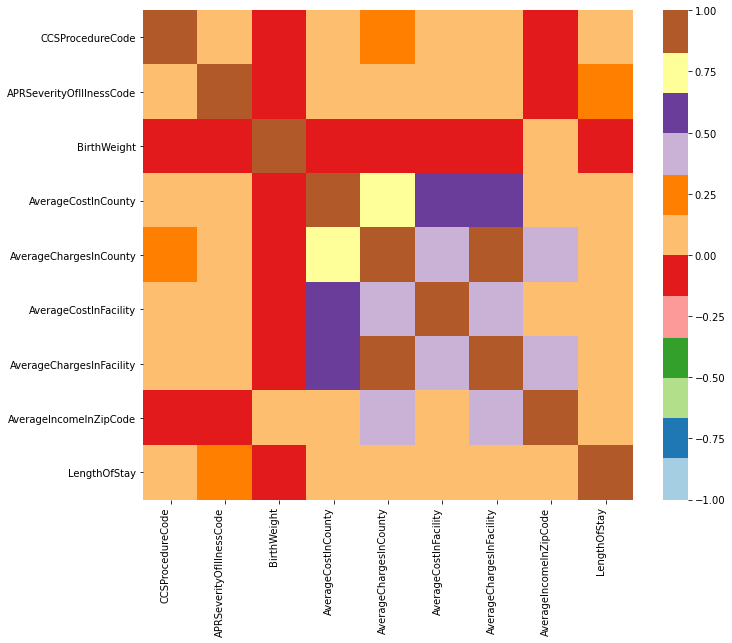

In [207]:
f,ax = plt.subplots(figsize=(11,9))
corr = df.corr()
#print(corr)
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,
                cmap='Paired',square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

<br><b> Some observations from the heatmap regarding the relationship between variables :</b>
<br>1.The AverageChargesInCounty and AverageChargesinFacility share a very strong correlation 
<br>2.AverageCostInCounty and AverageChargesInCounty share a little higher correlation around 0.75 
<br>3.AverageCostinFacility and AverageCostinCounty  0.5 
<br>4.AverageChargesinFacility and AverageCostInCounty 0.25 
<br>5.The LengthofStay and APRSSeverityOfIllnessCode seem to share some amount +ve correlation aroun 0.25 and all the others <br>6.share less than 0.25 correlation and BirthWeight seems to have  -ve correlation
<br><b> Ofcourse we have not mapped the relation of other categorical variables yet !!!</b>


## <b>***Now lets look at the applying logistic Regression model to see the classification model performance :***

### ***Step 1: Lets convert the categorical variables using one-hot encoding :***


In [208]:
#Can we remove the unknown example as it might be an outlier and also unwanted extra colun for processing 
from sklearn.preprocessing import OneHotEncoder

def convert_to_categorical(df,colname):
    OneHotEncoder_race = OneHotEncoder(handle_unknown='ignore')
    OneHotEncoder_race.fit(df[[colname]])
    one_hot_ = OneHotEncoder_race.transform(df[[colname]]).toarray()
    #print(one_hot_.shape,OneHotEncoder_race.categories_)

    for i in range(len(OneHotEncoder_race.categories_[0])):
        df[colname+'_'+ str(OneHotEncoder_race.categories_[0][i])] = one_hot_[:,i]
    fd = df.drop([colname],axis=1)
    return fd
    



In [209]:
df = convert_to_categorical(df,'Gender')
df=convert_to_categorical(df,'Race')
df=convert_to_categorical(df,'TypeOfAdmission')
df=convert_to_categorical(df,'PaymentTypology')
df=convert_to_categorical(df,'EmergencyDepartmentIndicator')
listofzeros= [0]* df.shape[0]
df.insert(21,'PaymentTypology_Department Of Corrections',listofzeros)
df.insert(19,'TypeOfAdmission_Trauma',listofzeros)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CCSProcedureCode                           59966 non-null  int64  
 1   APRSeverityOfIllnessCode                   59966 non-null  int64  
 2   BirthWeight                                59966 non-null  int64  
 3   AverageCostInCounty                        59966 non-null  int64  
 4   AverageChargesInCounty                     59966 non-null  int64  
 5   AverageCostInFacility                      59966 non-null  int64  
 6   AverageChargesInFacility                   59966 non-null  int64  
 7   AverageIncomeInZipCode                     59966 non-null  int64  
 8   LengthOfStay                               59966 non-null  int64  
 9   Gender_F                                   59966 non-null  float64
 10  Gender_M              

In [210]:
df.shape

(59966, 33)

## Splitting the dataset

In [211]:

with pd.option_context('mode.chained_assignment',None):
    train_data,test_data = train_test_split(df,test_size=0.2,shuffle=True,random_state=0)
with pd.option_context('mode.chained_assignment',None):
    train_data,val_data = train_test_split(train_data,test_size=0.25,shuffle=True,random_state=0)
print(train_data.shape,val_data.shape,test_data.shape)

(35979, 33) (11993, 33) (11994, 33)


In [212]:
train_X = train_data.drop(['LengthOfStay'],axis=1).to_numpy()
train_y = train_data['LengthOfStay'].to_numpy()

test_X = test_data.drop(['LengthOfStay'],axis=1).to_numpy()
test_y = test_data['LengthOfStay'].to_numpy()

val_X = val_data.drop(['LengthOfStay'],axis=1).to_numpy()
val_y = val_data['LengthOfStay'].to_numpy()

In [213]:
from sklearn.metrics import f1_score
from sklearn.metrics import *


def print_f1_scores(clf,train_X,train_y,val_X,val_y,tag):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    train_f1 = balanced_accuracy_score(train_y,train_pred)
    val_f1   = balanced_accuracy_score(val_y,val_pred)
    
    print("Train   balanced accuracy score:{:.3f}".format(train_f1))
    print("Train            accuracy score:{:.3f}".format(accuracy_score(train_y,train_pred)))
    print(tag," balanced accuracy score:{:.3f}".format(val_f1))
    
    print(tag,"          accuracy score:{:.3f}".format(accuracy_score(val_y,val_pred)))
    
def print_classification_report(model,X,y,tag=" "):
    pred = model.predict(X)
    label_0=tag+"_"+"L0"
    label_1=tag+"_" +"L1"
    label_names = [label_0,label_1]
    print(classification_report(y,pred,target_names=label_names))

### Logistic Regression, without scaling and regularization

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Validation  balanced accuracy score:0.640
Validation           accuracy score:0.690
               precision    recall  f1-score   support

validation_L0       0.89      0.71      0.79     10001
validation_L1       0.28      0.57      0.38      1992

     accuracy                           0.69     11993
    macro avg       0.59      0.64      0.59     11993
 weighted avg       0.79      0.69      0.72     11993

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Test LogReg   balanced accuracy score:0.651
Test LogReg            accuracy score:0.693
                 precision    recall  f1-score   support

Test LogReg _L0       0.89      0.72      0.79      9943
Test LogReg _L1       0.30      0.59      0.40      2051

       accuracy                           0.69     11994
      macro avg       0.60      0.65      0.59     11994
   weighted avg       0.79      0.69      0.73     11994

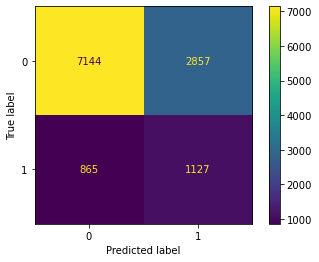

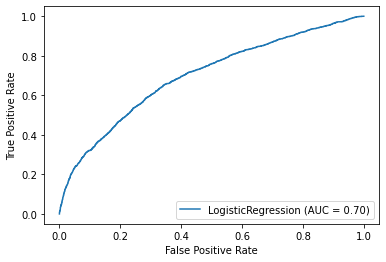

In [214]:
#Basic Logistic Regression 
from sklearn.metrics import plot_confusion_matrix 
clf = LogisticRegression(random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X,train_y.ravel())
plot_confusion_matrix(clf,val_X,val_y)
print_f1_scores(clf,train_X,train_y,val_X,val_y,"Validation")
print_classification_report(clf,val_X,val_y,"validation")
print_f1_scores(clf,train_X,train_y,test_X,test_y,"Test LogReg ")
print_classification_report(clf,test_X,test_y,"Test LogReg ")
plot_roc_curve(clf,test_X,test_y)

<b> In Summary:</b>
<br>1. The train and validation accuracy score are very close to each other around 0.640 and hence removing any need for regularization and even the test accuracy score is 0.651
<br>2. The precision for label0 is 0.90 and label1 is 0.30 . The precision is low for label1 owing to less class imbalance
<br>3. And the AUC is 0.70 which is like 70% 
<br>4. The f1score is low for label1 and around 0.80 for label0 

## Logistic Regression, Regularized but not scaling 

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Validation LogReg L1  balanced accuracy score:0.640
Validation LogReg L1           accuracy score:0.690
                         precision    recall  f1-score   support

validation LogReg L1_L0       0.89      0.71      0.79     10001
validation LogReg L1_L1       0.28      0.57      0.38      1992

               accuracy                           0.69     11993
              macro avg       0.59      0.64      0.59     11993
           weighted avg       0.79      0.69      0.72     11993

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Test LogReg L1  balanced accuracy score:0.650
Test LogReg L1           accuracy score:0.694
                   precision    recall  f1-score   support

Test LogReg L1_L0       0.89      0.72      0.79      9943
Test LogReg L1_L1       0.30      0.58      0.39      2051

         accuracy                           0.69     11994
        macro avg    

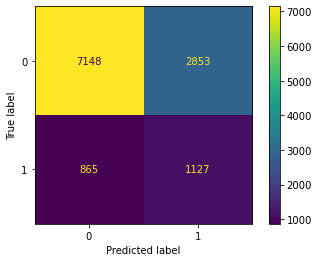

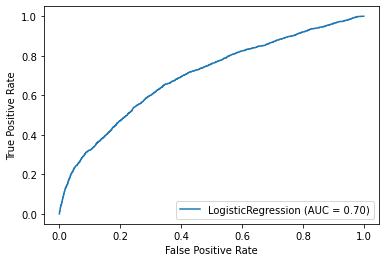

In [215]:
clf_l1 = LogisticRegression(penalty='l1',C=0.75,random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X,train_y.ravel())
plot_confusion_matrix(clf_l1,val_X,val_y)
print_f1_scores(clf_l1,train_X,train_y,val_X,val_y,"Validation LogReg L1")
print_classification_report(clf_l1,val_X,val_y,"validation LogReg L1")
print_f1_scores(clf_l1,train_X,train_y,test_X,test_y,"Test LogReg L1")
print_classification_report(clf_l1,test_X,test_y,"Test LogReg L1")
plot_roc_curve(clf_l1,test_X,test_y)

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Validation LogReg L2  balanced accuracy score:0.640
Validation LogReg L2           accuracy score:0.690
                         precision    recall  f1-score   support

validation LogReg L2_L0       0.89      0.72      0.79     10001
validation LogReg L2_L1       0.28      0.57      0.38      1992

               accuracy                           0.69     11993
              macro avg       0.59      0.64      0.59     11993
           weighted avg       0.79      0.69      0.72     11993

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Test LogReg L2  balanced accuracy score:0.650
Test LogReg L2           accuracy score:0.693
                   precision    recall  f1-score   support

Test LogReg L2_L0       0.89      0.72      0.79      9943
Test LogReg L2_L1       0.30      0.58      0.39      2051

         accuracy                           0.69     11994
        macro avg    

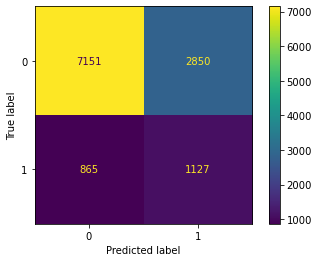

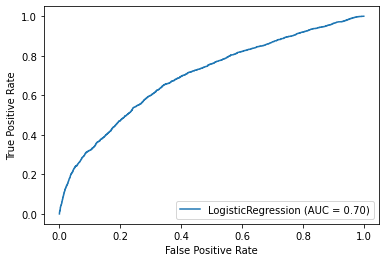

In [216]:
clf_l2 = LogisticRegression(penalty='l2',C=0.75,random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X,train_y.ravel())
plot_confusion_matrix(clf_l2,val_X,val_y)
print_f1_scores(clf_l2,train_X,train_y,val_X,val_y,"Validation LogReg L2")
print_classification_report(clf_l2,val_X,val_y,"validation LogReg L2")
print_f1_scores(clf_l2,train_X,train_y,test_X,test_y,"Test LogReg L2")
print_classification_report(clf_l2,test_X,test_y,"Test LogReg L2")
plot_roc_curve(clf_l2,test_X,test_y)

<b>*Regularization does not help further improve scores as already we observe that both validation and train accuracy and performance metrics are same*

### **Scaling the attributes and fitting

In [217]:
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  StandardScaler

In [218]:
MinMaxScaler_Train = MinMaxScaler().fit(train_X)
train_X_scale= MinMaxScaler_Train.transform(train_X)
val_X_scale = MinMaxScaler_Train.transform(val_X)
test_X_scale= MinMaxScaler_Train.transform(test_X)

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Validation LogReg MinMaxScale  balanced accuracy score:0.640
Validation LogReg MinMaxScale           accuracy score:0.690
                                  precision    recall  f1-score   support

Validation LogReg MinMaxScale_L0       0.89      0.72      0.79     10001
Validation LogReg MinMaxScale_L1       0.28      0.57      0.38      1992

                        accuracy                           0.69     11993
                       macro avg       0.59      0.64      0.59     11993
                    weighted avg       0.79      0.69      0.72     11993

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Test LogReg MinMaxScale  balanced accuracy score:0.651
Test LogReg MinMaxScale           accuracy score:0.694
                            precision    recall  f1-score   support

Test LogReg MinMaxScale_L0       0.89      0.72      0.80      9943
Test LogReg MinMaxScale_L1      

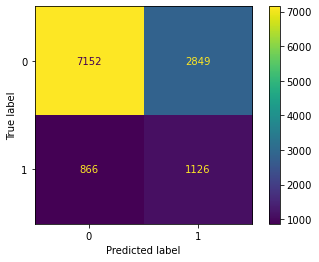

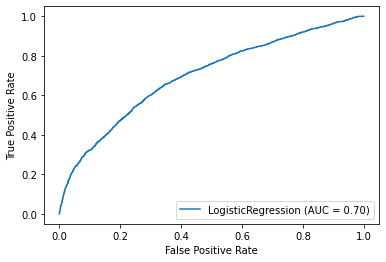

In [219]:
clf_scale = LogisticRegression(random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X_scale,train_y.ravel())
plot_confusion_matrix(clf_scale,val_X_scale,val_y)
print_f1_scores(clf_scale,train_X_scale,train_y,val_X_scale,val_y,"Validation LogReg MinMaxScale")
print_classification_report(clf_scale,val_X_scale,val_y,"Validation LogReg MinMaxScale")
print_f1_scores(clf_scale,train_X_scale,train_y,test_X_scale,test_y,"Test LogReg MinMaxScale")
print_classification_report(clf_scale,test_X_scale,test_y,"Test LogReg MinMaxScale")
plot_roc_curve(clf_scale,test_X_scale,test_y)

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Validation LogReg StandardScale  balanced accuracy score:0.640
Validation LogReg StandardScale           accuracy score:0.690
                                    precision    recall  f1-score   support

Validation LogReg StandardScale_L0       0.89      0.72      0.79     10001
Validation LogReg StandardScale_L1       0.28      0.56      0.38      1992

                          accuracy                           0.69     11993
                         macro avg       0.59      0.64      0.59     11993
                      weighted avg       0.79      0.69      0.72     11993

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Test LogReg StandardScale  balanced accuracy score:0.651
Test LogReg StandardScale           accuracy score:0.694
                              precision    recall  f1-score   support

Test LogReg StandardScale_L0       0.89      0.72      0.80      9943
Test Log

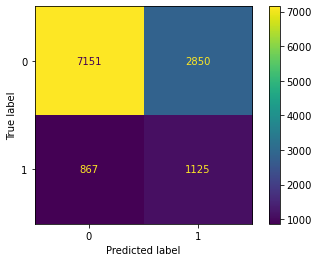

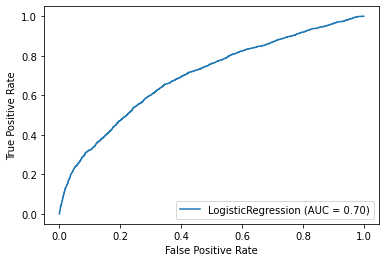

In [220]:
StandardScaler_Train = StandardScaler().fit(train_X)
train_X_std= StandardScaler_Train.transform(train_X)
val_X_std = StandardScaler_Train.transform(val_X)
test_X_std = StandardScaler_Train.transform(test_X)
clf_std = LogisticRegression(random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X_std,train_y.ravel())
print_f1_scores(clf_std,train_X_std,train_y,val_X_std,val_y,"Validation LogReg StandardScale")
plot_confusion_matrix(clf_std,val_X_std,val_y)
print_classification_report(clf_std,val_X_std,val_y,"Validation LogReg StandardScale")
print_f1_scores(clf_std,train_X_std,train_y,test_X_std,test_y,"Test LogReg StandardScale")
print_classification_report(clf_std,test_X_std,test_y,"Test LogReg StandardScale")
plot_roc_curve(clf_std,test_X_std,test_y)
pred_test_y = clf_std.predict(test_X_std)

<b>The logistic regression Summary :</b>
<br>1.The precision for L0 is good whereas the precision for LOS =1 is not that great with this model.<b>*Primarily this is due to class imbalance*</b> 
<br>2. The AUC is around 0.70 

# Random Forest 

*** 
Since we saw class imbalance we will look at Random forest and see if they help improve the prediction for the  minorty class as well
***

### Random forest with max_depth=16 

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=16, random_state=0)
rf.fit(train_X, train_y)
print_f1_scores(rf,train_X,train_y,val_X,val_y,  "RF Validation ")
print_f1_scores(rf,train_X,train_y,test_X,test_y,"RF Test ")
print_classification_report(rf, val_X, val_y,tag="RF Validation ")
print_classification_report(rf,test_X,test_y,tag="RF Test ")

Train   balanced accuracy score:0.689
Train            accuracy score:0.895
RF Validation   balanced accuracy score:0.576
RF Validation            accuracy score:0.844
Train   balanced accuracy score:0.689
Train            accuracy score:0.895
RF Test   balanced accuracy score:0.569
RF Test            accuracy score:0.837
                   precision    recall  f1-score   support

RF Validation _L0       0.86      0.98      0.91     10001
RF Validation _L1       0.61      0.17      0.27      1992

         accuracy                           0.84     11993
        macro avg       0.73      0.58      0.59     11993
     weighted avg       0.82      0.84      0.81     11993

              precision    recall  f1-score   support

 RF Test _L0       0.85      0.98      0.91      9943
 RF Test _L1       0.58      0.16      0.25      2051

    accuracy                           0.84     11994
   macro avg       0.72      0.57      0.58     11994
weighted avg       0.80      0.84      0.80    

*-> The precision is quite good around **0.85** for label 0 and around **0.58** for label 1 which is pretty good .
<br>-> Label0 f1score is higher around **0.91** and around **0.27** for Label1.*  **Label1's precision has imporved**
<br>*-> The balanced accuracy score and accuracy score seem to differ , but we see that with accuracy score of almost 0.844 on validation dataset*

### Random forest with min_samples_split =4 

In [222]:
rf = RandomForestClassifier(min_samples_split=4, random_state=0)
rf.fit(train_X, train_y)
print_f1_scores(rf,train_X,train_y, val_X, val_y,"RF Validation ")
print_f1_scores(rf,train_X,train_y,test_X,test_y,"RF Test ")
print_classification_report(rf, val_X, val_y,tag="RF Valdation ")
print_classification_report(rf,test_X,test_y,tag="RF Test ")

Train   balanced accuracy score:0.812
Train            accuracy score:0.931
RF Validation   balanced accuracy score:0.590
RF Validation            accuracy score:0.825
Train   balanced accuracy score:0.812
Train            accuracy score:0.931
RF Test   balanced accuracy score:0.587
RF Test            accuracy score:0.820
                  precision    recall  f1-score   support

RF Valdation _L0       0.86      0.94      0.90     10001
RF Valdation _L1       0.45      0.24      0.31      1992

        accuracy                           0.83     11993
       macro avg       0.66      0.59      0.61     11993
    weighted avg       0.79      0.83      0.80     11993

              precision    recall  f1-score   support

 RF Test _L0       0.86      0.94      0.90      9943
 RF Test _L1       0.45      0.23      0.31      2051

    accuracy                           0.82     11994
   macro avg       0.65      0.59      0.60     11994
weighted avg       0.79      0.82      0.80     11994

***
## Hyperparameter-Tuning using min_samples_splits
***

                     precision    recall  f1-score   support

RF Validation 2 _L0       0.86      0.92      0.89     10001
RF Validation 2 _L1       0.40      0.25      0.31      1992

           accuracy                           0.81     11993
          macro avg       0.63      0.59      0.60     11993
       weighted avg       0.78      0.81      0.80     11993

                     precision    recall  f1-score   support

RF Test       2 _L0       0.86      0.92      0.89      9943
RF Test       2 _L1       0.40      0.25      0.31      2051

           accuracy                           0.81     11994
          macro avg       0.63      0.59      0.60     11994
       weighted avg       0.78      0.81      0.79     11994

                     precision    recall  f1-score   support

RF Validation 4 _L0       0.86      0.94      0.90     10001
RF Validation 4 _L1       0.45      0.24      0.31      1992

           accuracy                           0.83     11993
          macro 

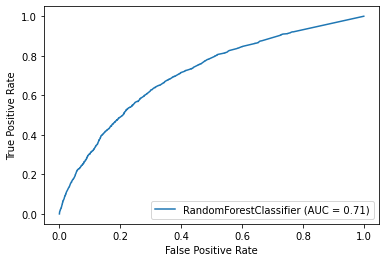

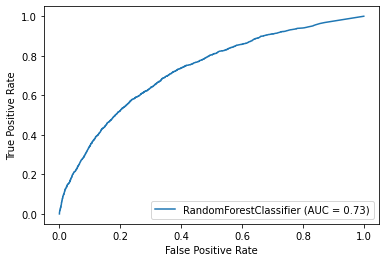

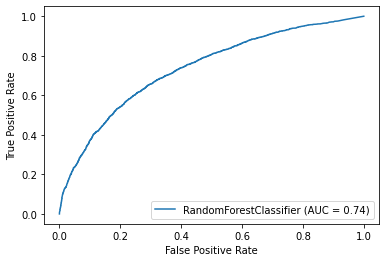

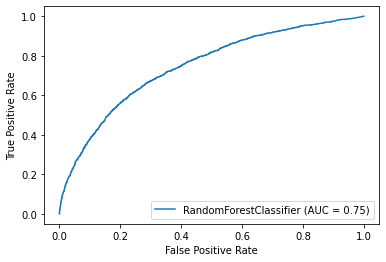

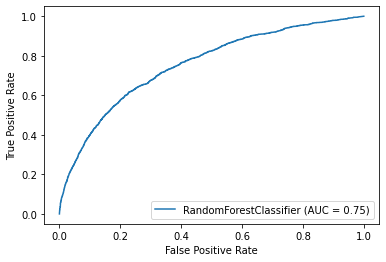

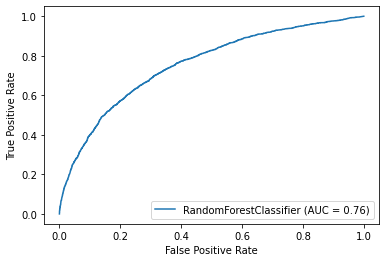

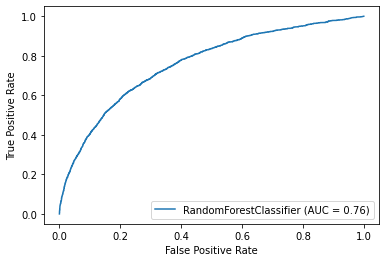

In [223]:
from sklearn.metrics import *
train_acc_balanced=list()
val_acc_balanced  =list()
train_acc = list()
val_acc = list()
test_acc = list()
train_class = list()
val_class = list()
for split in [2,4,6,8,10,12,14]:
    rf = RandomForestClassifier(min_samples_split=split, random_state=0)
    rf.fit(train_X, train_y)
    pred_train_y = rf.predict(train_X)
    pred_val_y   = rf.predict(val_X)
    pred_test_y  = rf.predict(test_X)
    train_acc_balanced.append(balanced_accuracy_score(train_y,pred_train_y))
    val_acc_balanced.append(balanced_accuracy_score(val_y,pred_val_y))
    train_acc.append(accuracy_score(train_y,pred_train_y))
    val_acc.append(accuracy_score(val_y,pred_val_y))
    test_acc.append(accuracy_score(test_y,pred_test_y))
    train_class.append(classification_report(train_y,pred_train_y))
    val_class.append(classification_report(val_y,pred_val_y))
    string = "RF Validation " + str(split) + " "
    print_classification_report(rf, val_X, val_y,tag=string)
    string = "RF Test       " + str(split) + " "
    print_classification_report(rf,test_X,test_y,tag=string)
    plot_roc_curve(rf,test_X,test_y)
    
    

### Plot the training and validation accuracy across min splits 

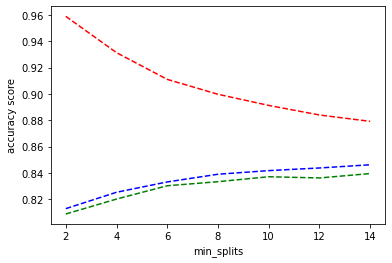

In [224]:
splits=[2,4,6,8,10,12,14]
plt.plot(splits,train_acc,'r--')
plt.plot(splits,val_acc,'b--')
plt.plot(splits,test_acc,'g--')
plt.xlabel('min_splits')
plt.ylabel('accuracy score')

plt.show()

                     precision    recall  f1-score   support

RF Validation 4 _L0       0.83      1.00      0.91     10001
RF Validation 4 _L1       1.00      0.00      0.00      1992

           accuracy                           0.83     11993
          macro avg       0.92      0.50      0.46     11993
       weighted avg       0.86      0.83      0.76     11993

                     precision    recall  f1-score   support

RF Test       4 _L0       0.83      1.00      0.91      9943
RF Test       4 _L1       1.00      0.00      0.00      2051

           accuracy                           0.83     11994
          macro avg       0.91      0.50      0.45     11994
       weighted avg       0.86      0.83      0.75     11994

                     precision    recall  f1-score   support

RF Validation 6 _L0       0.84      1.00      0.91     10001
RF Validation 6 _L1       0.79      0.06      0.10      1992

           accuracy                           0.84     11993
          macro 

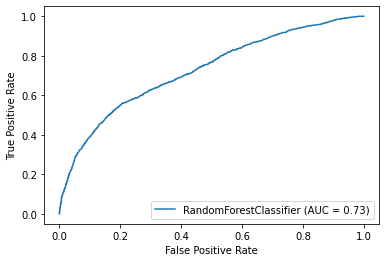

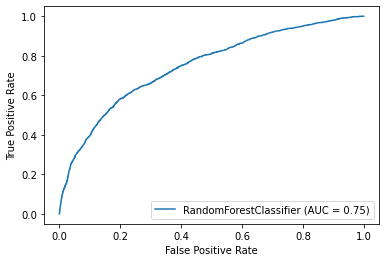

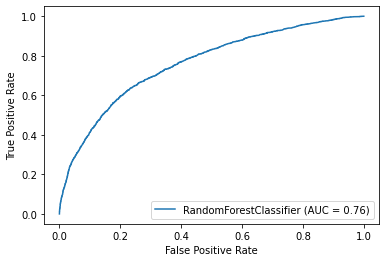

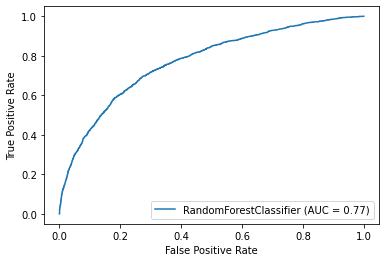

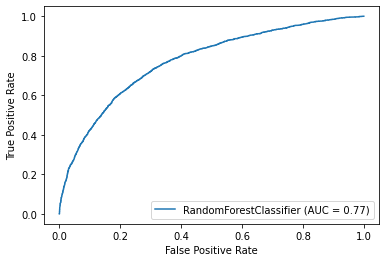

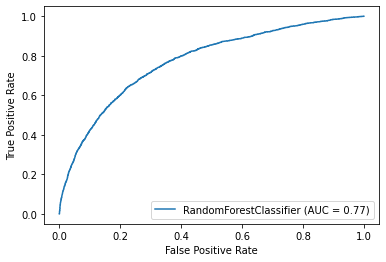

In [225]:
from sklearn.metrics import *
train_acc=list()
val_acc  =list()
train_class = list()
val_class = list()
for depth in [4,6,8,10,12,14]:
    rf = RandomForestClassifier(max_depth=depth, random_state=0)
    rf.fit(train_X, train_y)
    pred_train_y = rf.predict(train_X)
    pred_val_y   = rf.predict(val_X)
    pred_test_y   = rf.predict(test_X)
    train_acc.append(balanced_accuracy_score(train_y,pred_train_y))
    val_acc.append(balanced_accuracy_score(val_y,pred_val_y))
    train_class.append(classification_report(train_y,pred_train_y))
    val_class.append(classification_report(val_y,pred_val_y))
    string = "RF Validation " + str(depth) + " "
    print_classification_report(rf, val_X, val_y,tag=string)
    string = "RF Test       " + str(depth) + " "
    print_classification_report(rf,test_X,test_y,tag=string)
    plot_roc_curve(rf,test_X,test_y)

    

****
So at depth 10 we can get a good precision for both the labels around **0.84** and **0.70** for labels 0 and 1 respectively.
<br> We also observe good F1score of **0.91** for label 0 and **0.20** for label1
<br> And also the AUC=0.77 which is slightly also better than the logistic regression fit we saw 
***


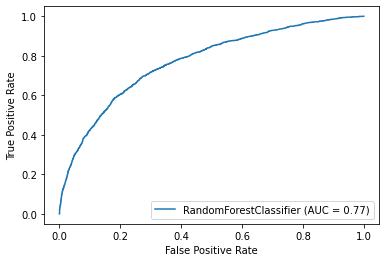

In [226]:
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(train_X, train_y)
pred_test_y = rf.predict(test_X)
plot_roc_curve(rf,test_X,test_y)
pred_test_y = rf.predict(test_X) 

<b>So we shall choose the randomforest classifier at depth 10 as our model giving slightly better AUC around 0.76

<b>***Finally lets generate the prediction ***

In [227]:
df_test.shape

(69177, 32)

In [228]:
test_pred=rf.predict(df_test.to_numpy())

In [229]:
print(test_pred.shape)

(69177,)


In [230]:
test_pred[0:3]

array([0, 0, 0], dtype=int64)

In [231]:
unique,counts = np.unique(test_pred,return_counts=True)

In [232]:
print(counts)

[68436   741]


In [233]:
#Loading the test data  
df_test = pd.read_csv('test_data.csv')
df_test.shape
df_test = df_test.drop(['ID','HealthServiceArea'],axis=1)
df_test =convert_to_categorical(df_test,'Gender')
df_test =convert_to_categorical(df_test,'Race')
df_test =convert_to_categorical(df_test,'TypeOfAdmission')
df_test =convert_to_categorical(df_test,'PaymentTypology')
df_test =convert_to_categorical(df_test,'EmergencyDepartmentIndicator')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69177 entries, 0 to 69176
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CCSProcedureCode                           69177 non-null  int64  
 1   APRSeverityOfIllnessCode                   69177 non-null  int64  
 2   BirthWeight                                69177 non-null  int64  
 3   AverageCostInCounty                        69177 non-null  int64  
 4   AverageChargesInCounty                     69177 non-null  int64  
 5   AverageCostInFacility                      69177 non-null  int64  
 6   AverageChargesInFacility                   69177 non-null  int64  
 7   AverageIncomeInZipCode                     69177 non-null  int64  
 8   Gender_F                                   69177 non-null  float64
 9   Gender_M                                   69177 non-null  float64
 10  Gender_U              

In [234]:
f = open('s3785704_predictions.csv','w+')
i=1
length = len(test_pred)
f.write('ID,LengthOfStay\n')
for i in range(0,length):
    if i+1 == length:
        string = str(i+1)+ ',' + str(test_pred[i]) 
    else:
        string = str(i+1)+ ',' + str(test_pred[i]) + '\n'
    f.write(string)
f.close()

In [235]:
print("Done")

Done
